In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/0105l/Desktop/고려대학교/대학교/3학년 1학기/통계적머신러닝 PBL/팀프로젝트/data/loan_final_data.csv")

In [3]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,1,0,0,0,0,0.0,146.412162,360.0,2,1
1,1,1,1,0,0,1508.0,128.000000,360.0,0,0
2,1,0,0,0,0,0.0,141.000000,360.0,2,1
3,1,1,2,0,0,1526.0,168.000000,360.0,2,1
4,1,1,2,0,0,700.0,70.000000,360.0,2,1


In [7]:
df['Loan_Status'].value_counts()

1    181
0     65
Name: Loan_Status, dtype: int64

In [8]:
# random forest, SVM, logistic regression을 통해 iris 품종을 분류
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_cl=LogisticRegression()
rf_cl=RandomForestClassifier()
svm_cl=SVC()
voting_cl=VotingClassifier(estimators=[('lr', log_cl), ('rf', rf_cl), ('svc', svm_cl)], voting='hard')
voting_cl.fit(X_train, y_train)

for cl in (log_cl, rf_cl, svm_cl, voting_cl):
    cl.fit(X_train, y_train)
    y_pred = cl.predict(X_test)
    print(cl.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7297297297297297
RandomForestClassifier 0.6756756756756757
SVC 0.7297297297297297
VotingClassifier 0.7297297297297297


In [9]:
# Bagging learning - 500개의 decision tree 이용
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_cl = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True)
# max_sample은 표본의 크기인데 60%를 이용하려면 max_sample=0.6을 설정.

bag_cl.fit(X_train, y_train)
y_pred = bag_cl.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7162162162162162


In [10]:
# out_of_bag (oob) 자료를 이용하여 test set의 accuracy 구함
# oob 자료는 oob_score = True로 지정.
bag_cl2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, n_jobs=-1,bootstrap=True, oob_score=True)
bag_cl2.fit(X_train, y_train)
print(bag_cl2.oob_score_)

0.7093023255813954


In [11]:
# Iris data에 M=500인 AdaBoost 적용
from sklearn.ensemble import AdaBoostClassifier
ada_t = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500, random_state=1)
ada_t.fit(X_train, y_train)
y_train_pred=ada_t.predict(X_train)
y_test_pred=ada_t.predict(X_test)

from sklearn.metrics import accuracy_score
ada_train=accuracy_score(y_train, y_train_pred)
ada_test=accuracy_score(y_test, y_test_pred)

print("Adaboost train/test accuracy %0.3f/%0.3f" %(ada_train, ada_test))

Adaboost train/test accuracy 1.000/0.689


In [12]:
# Iris data에 기울기 부스팅 적용
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
gbcl=GradientBoostingClassifier(n_estimators=100, max_depth=2) # M=100, 나무 깊이=2
gbcl.fit(X_train, y_train)
accuracies=[accuracy_score(y_test,y_pred) for y_pred in gbcl.staged_predict(X_test)]
best_n_estimator=np.argmax(accuracies)
gbcl_best=GradientBoostingClassifier(max_depth=2, n_estimators=best_n_estimator)
gbcl_best.fit(X_train, y_train)
y_train_pred=gbcl_best.predict(X_train)
y_test_pred=gbcl_best.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
print(best_n_estimator)


0.7558139534883721
0.7297297297297297
15


In [38]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=500, criterion='mse', random_state=1)
forest.fit(X_train, y_train)
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE train : %0.3f, test: %0.3f' 
      %(np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R**2 train : %0.3f, test: %0.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
y_test_pred=rfc.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test_pred, y_test))

# Naive Bayes의 83%보다 월등하게 향상된 결과임.

              precision    recall  f1-score   support

           0       0.03      0.17      0.05         6
           1       0.94      0.71      0.81       117

    accuracy                           0.68       123
   macro avg       0.49      0.44      0.43       123
weighted avg       0.90      0.68      0.77       123



In [28]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

data_dim=xgb.DMatrix(data=X, label=y)

xg_reg=xgb.XGBRegressor(objective='reg:squarederror',booster='gbtree',colsample_bytree=0.75, 
                        learning_rate=0.1,max_depth=5, alpha=10, n_estimators=30)
xg_reg.fit(X_train, y_train)
pred_train=xg_reg.predict(X_train)
pred_test=xg_reg.predict(X_test)
rmse_train=np.sqrt(mean_squared_error(y_train,pred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,pred_test))
print('RMSE train : %0.3f, test: %0.3f' %(rmse_train, rmse_test))


RMSE train : 0.428, test: 0.457


In [29]:
paras={'objective':'reg:squarederror','colsample_bytree':0.6,'max_depth':5, 'alpha':10}
data_dim1=xgb.DMatrix(data=X_train,label=y_train)
cv_result=xgb.cv(dtrain=data_dim1, params=paras, nfold=5,num_boost_round=60, 
                 early_stopping_rounds=20,metrics='rmse',as_pandas=True, seed=1)
cv_result.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.476177,0.003618,0.478798,0.004800
1,0.461457,0.005762,0.466528,0.008427
2,0.451983,0.007425,0.458584,0.010349
3,0.445738,0.008126,0.453136,0.013022
4,0.441881,0.008887,0.449986,0.014677


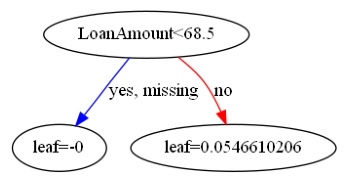

In [31]:
xg_reg1=xgb.train(params=paras, dtrain=data_dim1, num_boost_round=60)
                
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg1,num_trees=0)
plt.rcParams['figure.figsize']=[80,20]
plt.show()

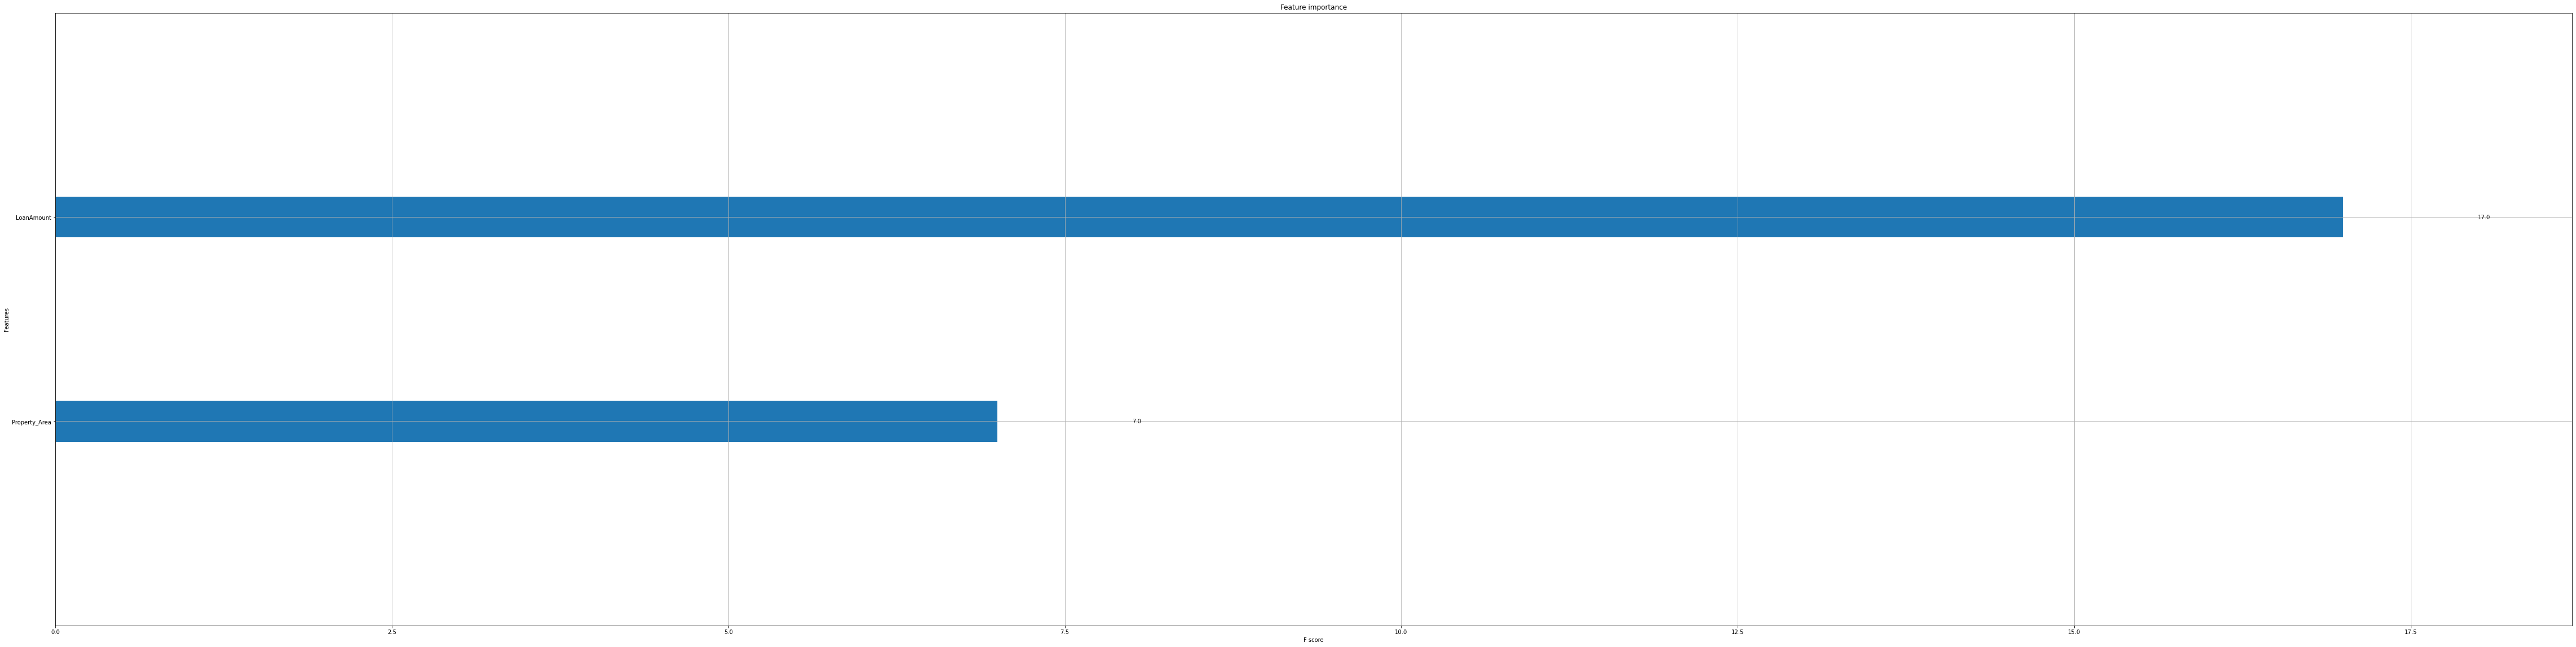

In [32]:
xgb.plot_importance(xg_reg1)
plt.rcParams['figure.figsize']=[15,15]
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV
param={'max_depth':range(3,10,2),'colsample_bytree':[i/100.0 for i in range(75,90,5)]}
xgsearch=GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', max_depth=5,alpha=10),param_grid=param,
                      scoring='neg_mean_squared_error', cv=5)
xgsearch.fit(X_train,y_train)
xgsearch.best_params_, xgsearch.best_score_

({'colsample_bytree': 0.8, 'max_depth': 3}, -0.19390625431744876)

In [35]:
!pip install lightgbm

  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)


In [36]:
from lightgbm import LGBMRegressor
lgbm_reg=LGBMRegressor(booster='gbtree',colsample_bytree=0.75, learning_rate=0.1,max_depth=5, 
                       alpha=10, n_estimators=100)
lgbm_reg.fit(X_train, y_train)
pred_train=lgbm_reg.predict(X_train)
pred_test=lgbm_reg.predict(X_test)
rmse_train=np.sqrt(mean_squared_error(y_train,pred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,pred_test))
print('RMSE train : %0.3f, test: %0.3f' %(rmse_train, rmse_test))

[LightGBM] [Warning] Unknown parameter: booster
RMSE train : 0.356, test: 0.474


In [40]:
!pip install catboost

In [41]:
from catboost import CatBoostRegressor

model = CatBoostRegressor()
model.fit(X_train, y_train)

Learning rate set to 0.029403
0:	learn: 0.4277492	total: 141ms	remaining: 2m 21s
1:	learn: 0.4271232	total: 142ms	remaining: 1m 10s
2:	learn: 0.4264367	total: 144ms	remaining: 47.8s
3:	learn: 0.4247574	total: 145ms	remaining: 36.1s
4:	learn: 0.4241717	total: 146ms	remaining: 29s
5:	learn: 0.4223764	total: 147ms	remaining: 24.4s
6:	learn: 0.4204640	total: 149ms	remaining: 21.1s
7:	learn: 0.4202163	total: 149ms	remaining: 18.5s
8:	learn: 0.4196969	total: 150ms	remaining: 16.5s
9:	learn: 0.4187470	total: 151ms	remaining: 14.9s
10:	learn: 0.4176021	total: 152ms	remaining: 13.6s
11:	learn: 0.4161878	total: 153ms	remaining: 12.6s
12:	learn: 0.4155089	total: 153ms	remaining: 11.6s
13:	learn: 0.4144418	total: 155ms	remaining: 10.9s
14:	learn: 0.4128026	total: 156ms	remaining: 10.2s
15:	learn: 0.4114795	total: 157ms	remaining: 9.64s
16:	learn: 0.4097022	total: 158ms	remaining: 9.11s
17:	learn: 0.4079536	total: 159ms	remaining: 8.65s
18:	learn: 0.4069790	total: 159ms	remaining: 8.23s
19:	learn: 

In [50]:
from catboost import Pool,CatBoostRegressor

train_dataset = Pool(data=X_train, label=y_train)
eval_dataset = Pool(data=X_test, label=y_test)

model = CatBoostRegressor(l2_leaf_reg=0.01)
model.fit(train_dataset, use_best_model=True, eval_set=eval_dataset, verbose=False)

In [45]:
model.get_best_score()

{'learn': {'RMSE': 0.06499870883997069},
 'validation': {'RMSE': 0.45088169199660866}}

In [46]:
model.get_best_iteration()

6

In [47]:
model.feature_importances_

array([ 0.        , 17.19199875,  8.76399291,  0.        ,  0.        ,
       16.16895768, 23.97872437,  0.        , 33.89632629])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             246 non-null    int64  
 1   Married            246 non-null    int64  
 2   Dependents         246 non-null    int64  
 3   Education          246 non-null    int64  
 4   Self_Employed      246 non-null    int64  
 5   CoapplicantIncome  246 non-null    float64
 6   LoanAmount         246 non-null    float64
 7   Loan_Amount_Term   246 non-null    float64
 8   Property_Area      246 non-null    int64  
 9   Loan_Status        246 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 19.3 KB


In [52]:
from catboost import Pool,CatBoostClassifier
train_dataset = Pool(data=X_train, label=y_train)
eval_dataset = Pool(data=X_test, label=y_test)

model = CatBoostClassifier(l2_leaf_reg=0.01, iterations=10, depth=2)
model.fit(train_dataset, use_best_model=True, eval_set=eval_dataset)

0:	learn: 0.6852253	test: 0.6864726	best: 0.6864726 (0)	total: 2.81ms	remaining: 25.3ms
1:	learn: 0.6773491	test: 0.6804773	best: 0.6804773 (1)	total: 3.14ms	remaining: 12.6ms
2:	learn: 0.6688471	test: 0.6745708	best: 0.6745708 (2)	total: 3.62ms	remaining: 8.45ms
3:	learn: 0.6610349	test: 0.6686794	best: 0.6686794 (3)	total: 3.96ms	remaining: 5.95ms
4:	learn: 0.6546642	test: 0.6634558	best: 0.6634558 (4)	total: 4.39ms	remaining: 4.39ms
5:	learn: 0.6487681	test: 0.6586525	best: 0.6586525 (5)	total: 4.75ms	remaining: 3.17ms
6:	learn: 0.6424164	test: 0.6541788	best: 0.6541788 (6)	total: 5.18ms	remaining: 2.22ms
7:	learn: 0.6372346	test: 0.6499973	best: 0.6499973 (7)	total: 5.86ms	remaining: 1.46ms
8:	learn: 0.6323218	test: 0.6462643	best: 0.6462643 (8)	total: 6.55ms	remaining: 727us
9:	learn: 0.6276192	test: 0.6425603	best: 0.6425603 (9)	total: 7.01ms	remaining: 0us

bestTest = 0.6425602684
bestIteration = 9



In [53]:
model.get_best_score()

{'learn': {'Logloss': 0.6276192249563651},
 'validation': {'Logloss': 0.6425602684162103}}

In [54]:
model.get_best_iteration()

9

In [ ]:
y_train_pred=gbcl_best.predict(X_train)
y_test_pred=gbcl_best.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

In [55]:
model.feature_importances_

array([ 0.        , 14.23150371,  4.81909702,  0.        ,  0.        ,
       10.9392883 , 28.17873044,  0.        , 41.83138054])